In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
mdf= pd.read_csv('movies_metadata.csv')
cdf=pd.read_csv('credits.csv')

C:\Users\ADC\AppData\Local\Temp\ipykernel_3044\3039729235.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  mdf= pd.read_csv('movies_metadata.csv')


In [82]:
print(mdf.T)

                                                                   0      \
adult                                                              False   
belongs_to_collection  {'id': 10194, 'name': 'Toy Story Collection', ...   
budget                                                          30000000   
genres                 [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
homepage                            http://toystory.disney.com/toy-story   
id                                                                   862   
imdb_id                                                        tt0114709   
original_language                                                     en   
original_title                                                 Toy Story   
overview               Led by Woody, Andy's toys live happily in his ...   
popularity                                                     21.946943   
poster_path                             /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
production_c

In [85]:
print(cdf.T)

                                                  0      \
cast  [{'cast_id': 14, 'character': 'Woody (voice)',...   
crew  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...   
id                                                  862   

                                                  1      \
cast  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
crew  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   
id                                                 8844   

                                                  2      \
cast  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
crew  [{'credit_id': '52fe466a9251416c75077a89', 'de...   
id                                                15602   

                                                  3      \
cast  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
crew  [{'credit_id': '52fe44779251416c91011acb', 'de...   
id                                                31357   

                                                  4 

In [62]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [63]:
mdf_copy = mdf.copy()

# Handle missing values
mdf_copy['homepage'].fillna('Not Available', inplace=True)
mdf_copy.dropna(subset=['budget', 'revenue'], inplace=True)

In [64]:
# Convert 'budget' column to numeric without modifying the original DataFrame
mdf_copy['budget_numeric'] = pd.to_numeric(mdf_copy['budget'], errors='coerce')

In [65]:
Q1 = mdf_copy['budget_numeric'].quantile(0.25)
Q3 = mdf_copy['budget_numeric'].quantile(0.75)
IQR = Q3 - Q1
mdf_copy.loc[(mdf_copy['budget_numeric'] < (Q1 - 1.5 * IQR)) | (mdf_copy['budget_numeric'] > (Q3 + 1.5 * IQR)), 'budget_numeric'] = float('NaN')

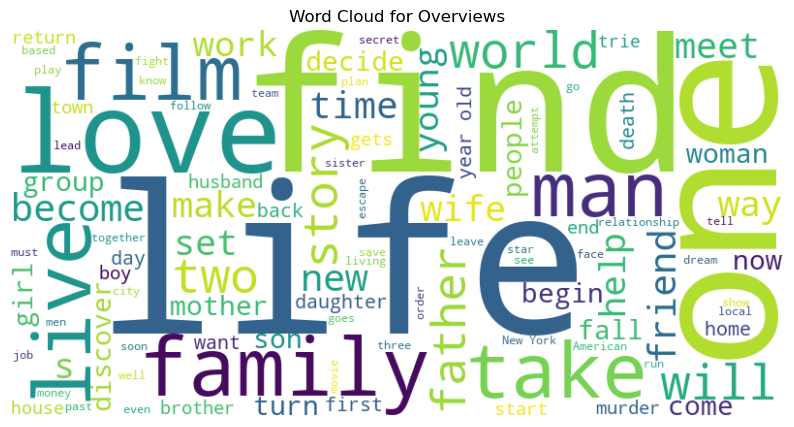

In [67]:
# Text data exploration - Word cloud for 'overview'
text_overview = ' '.join(mdf_copy['overview'].fillna(''))
wordcloud_overview = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_overview)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Overviews')
plt.show()

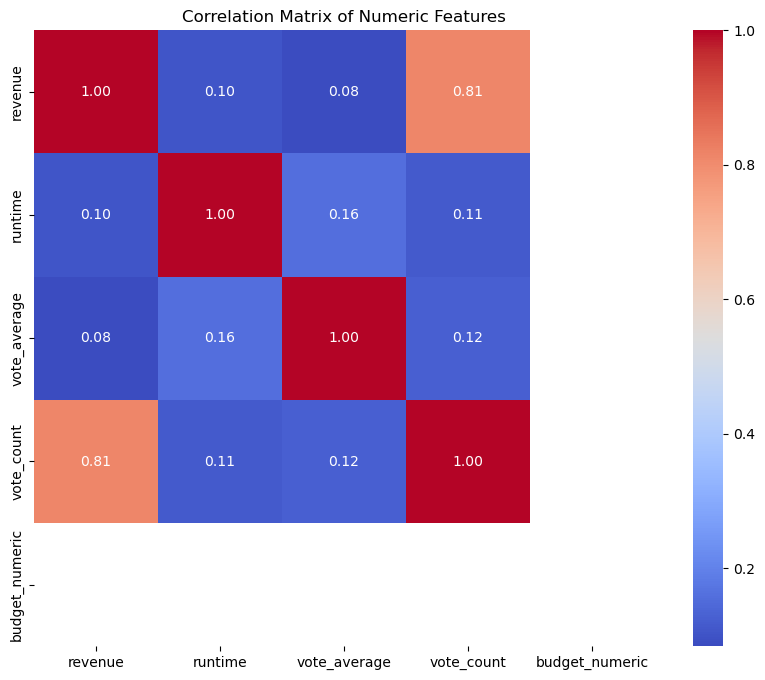

In [68]:
# Statistical analysis - Correlation matrix
numeric_cols = mdf_copy.select_dtypes(include=['float64']).columns.tolist()
correlation_matrix = mdf_copy[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

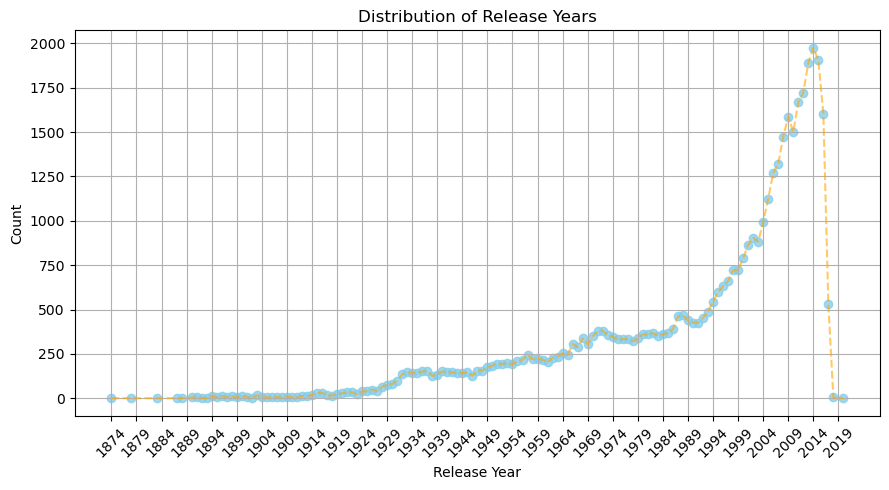

In [79]:
# Feature Engineering - Extracting release year from 'release_date'
mdf_copy['release_year'] = pd.to_datetime(mdf_copy['release_date']).dt.year

# Calculate release year counts
release_year_counts = mdf_copy['release_year'].value_counts().sort_index()

# Plotting release year counts using a scatter plot
plt.figure(figsize=(9,5))
plt.scatter(release_year_counts.index, release_year_counts.values, color='skyblue', alpha=0.8)
plt.plot(release_year_counts.index, release_year_counts.values, color='orange', linestyle='--', alpha=0.6)

plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(range(int(min(release_year_counts.index)), int(max(release_year_counts.index)) + 1, 5), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
mdf['id'] = mdf['id'].astype(str)
cdf['id'] = cdf['id'].astype(str)

In [15]:
# Assuming 'mdf' is the movies dataframe and 'cdf' is the credits dataframe
merged_df = pd.merge(mdf, cdf, on='id', how='left')


In [16]:
merged_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [17]:
merged_df['cast'].iloc[1]

"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr

In [18]:
merged_df['cast'] = merged_df['cast'].apply(lambda x: [actor['name'] for actor in eval(x)] if pd.notnull(x) else [])

In [19]:
merged_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [20]:
merged_df['crew'].iloc[1]

"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, '

In [21]:
def extract_director(crew_list):
    director = [member['name'] for member in crew_list if member['job'] == 'Director']
    return director[0] if director else None

# Apply the function to extract director names
merged_df['director'] = merged_df['crew'].apply(lambda x: extract_director(eval(x)) if pd.notnull(x) else None)

In [22]:
merged_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [23]:
merged_df['genres'].iloc[1]

"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"

In [24]:
def extract_genres(genres_list):
    genres = [genre['name'] for genre in genres_list]
    return genres


merged_df['genres'] = merged_df['genres'].apply(lambda x: extract_genres(eval(x)) if pd.notnull(x) else [])

In [25]:
merged_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",John Lasseter
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",Howard Deutch
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi...","[{'credit_id': '52fe44779251416c91011acb', 'de...",Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",Charles Shyer


In [26]:
#required columns aka features for recommendations
#['id','title','genres','overview','cast','director']

In [27]:
movies_df=merged_df[['id','title','genres','overview','cast','director']].copy()

In [28]:
movies_df.head()

,id,title,genres,overview,cast,director
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [29]:
movies_df.isnull().sum()

id            0
title         6
genres        0
overview    954
cast          0
director    891
dtype: int64

In [30]:
movies_df.dropna(subset=['title'], inplace=True)
movies_df.loc[:, 'overview'].fillna('', inplace=True)
movies_df.loc[:, 'director'].fillna('', inplace=True)

In [31]:
movies_df.isnull().sum()

id          0
title       0
genres      0
overview    0
cast        0
director    0
dtype: int64

In [32]:
movies_df['content'] = (
    movies_df['genres'].apply(lambda x: ' '.join(map(str, x))) + ' ' +
    movies_df['overview'] + ' ' +
    movies_df['cast'].apply(lambda x: ' '.join(map(str, x))) + ' ' +
    movies_df['director']
)

In [33]:
movies_df

,id,title,genres,overview,cast,director,content
0,862,Toy Story,"[Animation, Comedy, Family]","Led by Woody, Andy's toys live happily in his ...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,"Animation Comedy Family Led by Woody, Andy's t..."
1,8844,Jumanji,"[Adventure, Fantasy, Family]",When siblings Judy and Peter discover an encha...,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston,Adventure Fantasy Family When siblings Judy an...
2,15602,Grumpier Old Men,"[Romance, Comedy]",A family wedding reignites the ancient feud be...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch,Romance Comedy A family wedding reignites the ...
3,31357,Waiting to Exhale,"[Comedy, Drama, Romance]","Cheated on, mistreated and stepped on, the wom...","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker,"Comedy Drama Romance Cheated on, mistreated an..."
4,11862,Father of the Bride Part II,[Comedy],Just when George Banks has recovered from his ...,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer,Comedy Just when George Banks has recovered fr...
...,...,...,...,...,...,...,...
45537,439050,Subdue,"[Drama, Family]",Rising and falling between a man and woman.,"[Leila Hatami, Kourosh Tahami, Elham Korda]",Hamid Nematollah,Drama Family Rising and falling between a man ...
45538,111109,Century of Birthing,[Drama],An artist struggles to finish his work while a...,"[Angel Aquino, Perry Dizon, Hazel Orencio, Joe...",Lav Diaz,Drama An artist struggles to finish his work w...
45539,67758,Betrayal,"[Action, Drama, Thriller]","When one of her hits goes wrong, a professiona...","[Erika Eleniak, Adam Baldwin, Julie du Page, J...",Mark L. Lester,Action Drama Thriller When one of her hits goe...
45540,227506,Satan Triumphant,[],"In a small town live two brothers, one a minis...","[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov,"In a small town live two brothers, one a mini..."


In [34]:
movies_df["content"] = movies_df["content"].fillna("")

In [35]:
movies_df.isnull().sum()

id          0
title       0
genres      0
overview    0
cast        0
director    0
content     0
dtype: int64

In [36]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45536 entries, 0 to 45541
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        45536 non-null  object
 1   title     45536 non-null  object
 2   genres    45536 non-null  object
 3   overview  45536 non-null  object
 4   cast      45536 non-null  object
 5   director  45536 non-null  object
 6   content   45536 non-null  object
dtypes: object(7)
memory usage: 2.8+ MB


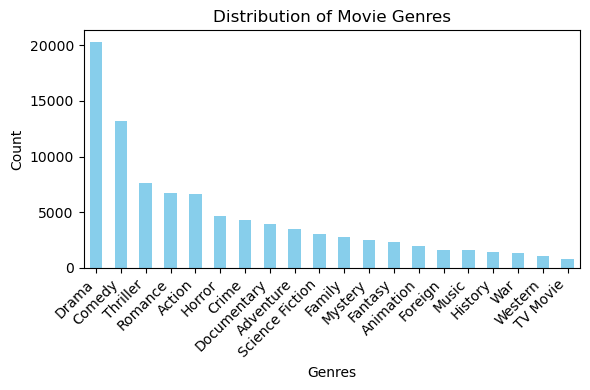

In [45]:
# Splitting genres into individual categories
genres_count = movies_df['genres'].explode().value_counts()

# Plotting the distribution of genres
plt.figure(figsize=(6, 4))
genres_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


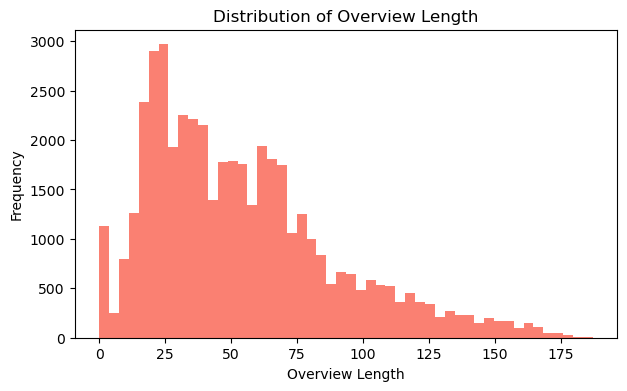

In [48]:
# Calculate overview length and create a histogram
movies_df['overview_length'] = movies_df['overview'].apply(lambda x: len(x.split()))
plt.figure(figsize=(7, 4))
plt.hist(movies_df['overview_length'], bins=50, color='salmon')
plt.title('Distribution of Overview Length')
plt.xlabel('Overview Length')
plt.ylabel('Frequency')
plt.show()

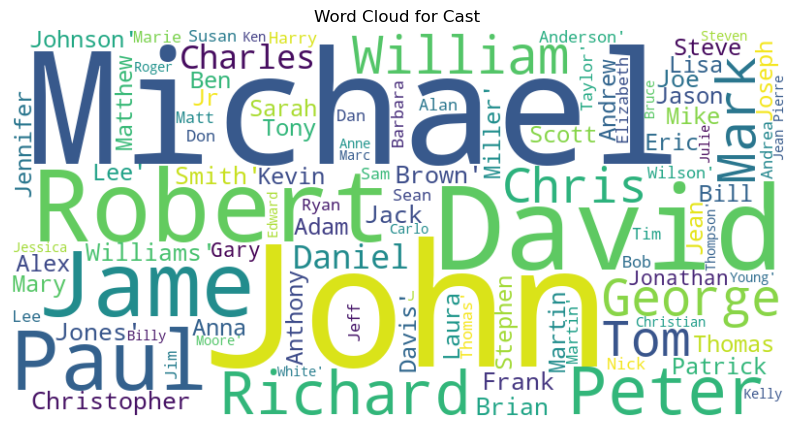

In [50]:
from wordcloud import WordCloud

# Handling missing values and converting to strings
movies_df['cast'] = movies_df['cast'].fillna('').astype(str)

# Word cloud for cast
text_cast = ' '.join(movies_df['cast'])
wordcloud_cast = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_cast)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_cast, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Cast')
plt.show()


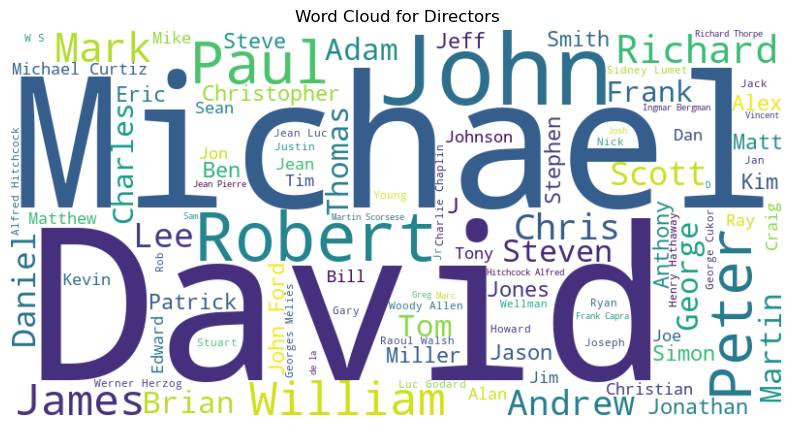

In [51]:
from wordcloud import WordCloud

# Handling missing values and converting to strings
movies_df['director'] = movies_df['director'].fillna('').astype(str)

# Word cloud for directors
text_directors = ' '.join(movies_df['director'])
wordcloud_directors = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text_directors)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_directors, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Directors')
plt.show()


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [29]:
vector = cv.fit_transform(movies_df['content']).toarray()

In [30]:
vector.shape

(45536, 5000)

In [31]:
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
similarity = cosine_similarity(vector)

In [33]:
def recommend(movie):
    index = movies_df[movies_df['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(movies_df.iloc[i[0]].title)

In [34]:
avenger_rows = movies_df[movies_df['title'].str.contains('spider', case=False)]
avenger_rows.head()

,id,title,genres,overview,cast,director,content
2713,91893,The Spiders - The Golden Sea,[Adventure],"In San Francisco, well-known sportsman Kay Hoo...","[Carl de Vogt, Ressel Orla, Georg John, Lil Da...",Fritz Lang,"Adventure In San Francisco, well-known sportsm..."
4116,2043,Along Came a Spider,"[Crime, Mystery, Thriller, Action]",When a teacher kidnaps a girl from a prestigio...,"[Morgan Freeman, Monica Potter, Michael Wincot...",Lee Tamahori,Crime Mystery Thriller Action When a teacher k...
5223,557,Spider-Man,"[Fantasy, Action]",After being bitten by a genetically altered sp...,"[Tobey Maguire, Willem Dafoe, Kirsten Dunst, J...",Sam Raimi,Fantasy Action After being bitten by a genetic...
5230,39154,The Giant Spider Invasion,"[Horror, Science Fiction]",A black hole hits North Wisconsin and opens a ...,"[Steve Brodie, Barbara Hale, Robert Easton, Le...",Bill Rebane,Horror Science Fiction A black hole hits North...
6070,9613,Spider,"[Drama, Mystery, Thriller]",A mentally disturbed man takes residence in a ...,"[Ralph Fiennes, Miranda Richardson, Gabriel By...",David Cronenberg,Drama Mystery Thriller A mentally disturbed ma...


In [35]:
recommend('Spider-Man')

Spider-Man 2
Spider-Man 3
Emmauksen tiellä
Hoffa
The Amazing Spider-Man 2
